In [ ]:
# import necessary library
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
# Checkpoint 1: Create a random dataset
np.random.seed(0)
num_points = 10
x_range = (0, 10)
y_range = (0, 10)
dataset = np.random.randint(low=min(x_range), high=max(y_range), size=(num_points, 2))
print(dataset)

[[5 0]
 [3 3]
 [7 9]
 [3 5]
 [2 4]
 [7 6]
 [8 8]
 [1 6]
 [7 7]
 [8 1]]


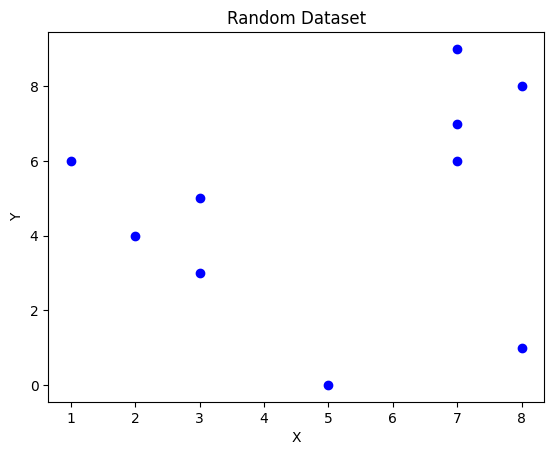

In [ ]:
# Checkpoint 2: Visualize the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], c='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Dataset')
plt.show()

In [ ]:
# Checkpoint 3, 4:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def average_link(cluster1, cluster2):
    total_distance = 0
    for point1 in cluster1:
        for point2 in cluster2:
            total_distance += euclidean_distance(point1, point2)
    return total_distance / (len(cluster1) * len(cluster2))

def hierarchical_clustering(data, num_clusters):
    clusters = [[point] for point in data]
    distances = np.zeros((len(clusters), len(clusters)))
    number_of_iteration = 0

    # 8. Repeat 3-7 until you get the dendogram with two clusters.
    while len(clusters) > num_clusters:
        min_distance = float('inf')
        merge_clusters = (0, 0)
        table = distances.tolist()
        p_cluster = clusters

        # 3. Compute the pair-wise distance between them using "Average distance" method.
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distances[i, j] = average_link(clusters[i], clusters[j])
                if distances[i, j] < min_distance:
                    min_distance = distances[i, j]
                    merge_clusters = (i, j)
                    '''
                    print(f'{i} and {j} distance calculation')
                    table = distances.tolist()
                    print(tabulate(table, tablefmt="fancy_grid"))
                    '''

        print("###################################################################################################")
        number_of_iteration = number_of_iteration + 1
        print(f'{number_of_iteration} number Etaration--------------')
        print("###################################################################################################")
        print(f'Distance Matrix------------------')

        # 4. Print the distance matrix. (Checkpoint#3)
        table = distances.tolist()
        print(tabulate(table, tablefmt="fancy_grid"))

        # 5. Now, merge the nearest two points to form a new cluster. 
        # 6. Print the merging information accordingly. (Chechpoint#4, for each iteration)
        result = clusters
        print("Before Merge All Cluster----------")
        for i, cluster in enumerate(result):
            print(f"Cluster {i+1}: {cluster}")
        cluster1, cluster2 = merge_clusters
        clusters[cluster1].extend(clusters[cluster2])
        clusters.pop(cluster2)
        distances = np.delete(distances, cluster2, axis=0)
        distances = np.delete(distances, cluster2, axis=1)
        print(f'===> Cluster {cluster1} and cluster {cluster2} merge here')     # Here if i get "cluster 1 and cluster 9 merge" means array index 1 and 9
        print("After Merge Cluster--------------")
        for i, cluster in enumerate(result):
            print(f"Cluster {i+1}: {cluster}")
        print()
      
    return clusters

# Example usage
data = dataset
num_clusters = 2

result = hierarchical_clustering(data, num_clusters)

# 9. Print the data points for each cluster. (Final Checkpoint)
print("Final Result k = 2")
for i, cluster in enumerate(result):
    print(f"Cluster {i+1}: {cluster}")


###################################################################################################
1 number Etaration--------------
###################################################################################################
Distance Matrix------------------
╒═══╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ 0 │ 3.60555 │ 9.21954 │ 5.38516 │ 5       │ 6.32456 │ 8.544   │ 7.2111  │ 7.28011 │ 3.16228 │
├───┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 0 │ 0       │ 7.2111  │ 2       │ 1.41421 │ 5       │ 7.07107 │ 3.60555 │ 5.65685 │ 5.38516 │
├───┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 0 │ 0       │ 0       │ 5.65685 │ 7.07107 │ 3       │ 1.41421 │ 6.7082  │ 2       │ 8.06226 │
├───┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 0 │ 0       │ 0       │ 0       │ 1.41421 │ 4.12311 │ 5.830